In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.drop(labels=["User ID"], axis=1, inplace=True)

In [15]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,Young_18-30,19000,0
1,Male,Middle_Aged_30-40,20000,0
2,Female,Young_18-30,43000,0
3,Female,Young_18-30,57000,0
4,Male,Young_18-30,76000,0


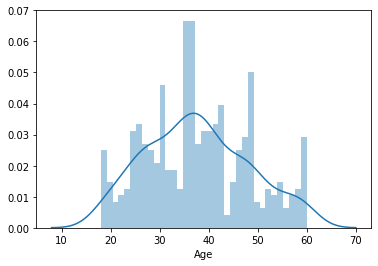

In [11]:
sns.distplot(df.Age, kde=False, bins=35)
#we see several peaks in the age group..so it is better to make smaller age bins and make it a categorical variable

In [8]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [12]:
def age(col):
    if col >=18 and col<=30:
        return 'Young_18-30'
    elif col>30 and col<=40:
        return 'Middle_Aged_30-40'
    else:
        return "Old_40+"

In [14]:
df.Age=df.Age.apply(age)

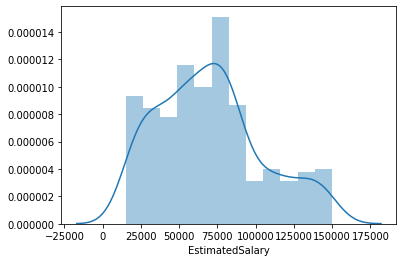

In [16]:
sns.distplot(df.EstimatedSalary)

In [25]:
dum=pd.get_dummies(df.loc[:,['Age','Gender']], drop_first=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null category
Age                400 non-null category
EstimatedSalary    400 non-null int64
Purchased          400 non-null category
dtypes: category(3), int64(1)
memory usage: 4.7 KB


In [21]:
df.Gender=df.Gender.astype("category")

In [22]:
df.Age=df.Age.astype("category")

In [23]:
df.Purchased=df.Purchased.astype("category")

In [26]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,Young_18-30,19000,0
1,Male,Middle_Aged_30-40,20000,0
2,Female,Young_18-30,43000,0
3,Female,Young_18-30,57000,0
4,Male,Young_18-30,76000,0


In [30]:
df=pd.concat([df, dum], axis=1)

In [31]:
df.drop(labels=["Gender", "Age"], axis=1, inplace=True)

In [32]:
df.head()

,EstimatedSalary,Purchased,Age_Old_40+,Age_Young_18-30,Gender_Male
0,19000,0,0,1,1
1,20000,0,0,0,1
2,43000,0,0,1,0
3,57000,0,0,1,0
4,76000,0,0,1,1


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
classifier=LogisticRegression()

In [33]:
df.columns

Index(['EstimatedSalary', 'Purchased', 'Age_Old_40+', 'Age_Young_18-30',
       'Gender_Male'],
      dtype='object')

In [34]:
X=df.loc[:,['EstimatedSalary','Age_Old_40+', 'Age_Young_18-30',
       'Gender_Male']]

In [35]:
y=df.loc[:,"Purchased"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1429)

In [39]:
classifier.fit(X_train, y_train)

C:\Users\bishw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
pred=classifier.predict(X_test)

In [42]:
from sklearn import metrics

In [44]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        76
           1       0.64      0.57      0.60        44

    accuracy                           0.73       120
   macro avg       0.70      0.69      0.70       120
weighted avg       0.72      0.72      0.72       120



In [46]:
cm=metrics.confusion_matrix(y_test, pred)

In [49]:
AUC=metrics.roc_auc_score(y_test, pred)

In [51]:
AUC

0.6919856459330145